In [1]:
import os, sys
note_dir = os.path.abspath('')
root_dir = os.path.dirname(note_dir)
lib_dir = os.path.join(root_dir, 'mylib')
if not note_dir in sys.path: sys.path.append(note_dir)
if not lib_dir in sys.path: sys.path.append(lib_dir)

In [2]:
import numpy as np
import pandas as pd

from LogisticRegression import LogisticRegressionGD
from plots import plot_decision_regions

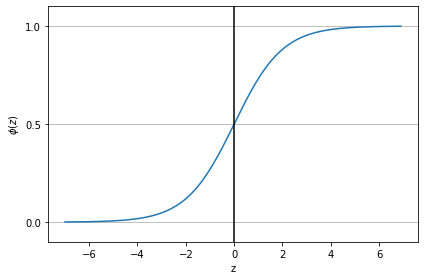

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


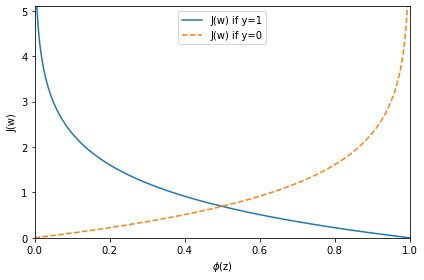

In [4]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

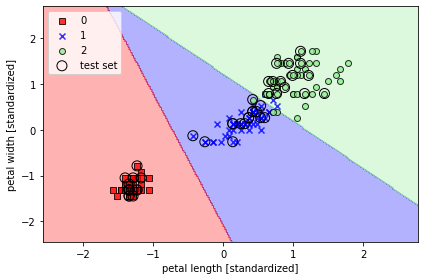

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=1, stratify=y)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
lr = LogisticRegression(C=100.0, random_state=1,
                        solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [6]:
lr.predict_proba(X_test_std[:3, :])
# sum probabilities to 1
# lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([[3.75921857e-09, 1.44746713e-01, 8.55253283e-01],
       [8.34050709e-01, 1.65949291e-01, 2.79885839e-13],
       [8.48851960e-01, 1.51148040e-01, 2.22264680e-14]])

In [7]:
# help(lr.predict_proba(X_test_std[:3, :]).argmax)
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [8]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [9]:
# lr.predict(X_test_std[0, :].reshape(1, -1))
# help(np.reshape)
# print(X_test_std[0, :].shape)
print(X_test_std[0, :])
# reshape arg -1 means unknown and let numpy figure it out
X_test_std[0, :].reshape(1, -1)

[0.93327055 1.44883158]


array([[0.93327055, 1.44883158]])

In [10]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

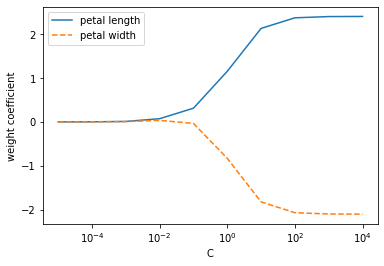

In [11]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()


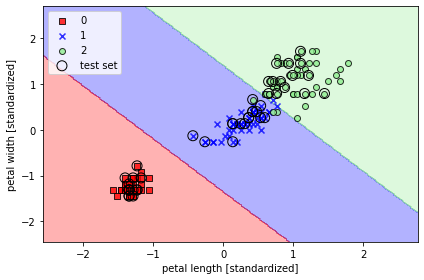

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')